<a href="https://colab.research.google.com/github/umharshitha5/Airbnb_data_analysis/blob/main/Airbnb_data_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project name : AirBNB Booking analysis using explotory data analysis
project type : EDA





### project summary
Since 2008 , guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique,personalized way of experiencing the wrod .Today ,Air bnb became one of king service that is used and recognized by whole world .Data anlysis on millions of listings provided through Airbnb is a crucial factor for the company.These millions of listings generate a lot of data , data that can be analyzed and used for security,business decisions,understanding of customers and providers (hosts) behaviour and performance on the platform, guiding marketing inatives, implementation of innovative additional services and much more .
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.


### Analyzing the data set and find some insights for the below questions

1.What can we learn about different hosts and areas ?

2.what we learn from room type and their price according to areas ?

3.what can we learn from data ?(ex: locations,prices,reviews,etc)

4.which hosts are the busiest and why is the reason?

5.which hosts are charging higher price?

6.is there any traffic difference among different areas and what could be the reason for it ?

7.what is the correlation between different variables ?

8.what is the room count in overall NYC according to listing of room types ?


Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
airbnb = pd.read_csv("/content/drive/MyDrive/AB_NYC_2019.csv")
airbnb
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Describing data

In [5]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Removing unnecessary colums

In [9]:
airbnb.drop(['latitude','longitude','last_review','reviews_per_month'],axis=1,inplace=True)

In [10]:
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188


### 1.what can we learn about different hosts and areas ?

In [11]:
host_areas =airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


### we found that hostname Sonder(NYC) has listed highest number of listing in manhattan followed by Blueground

## 2.what we learn from room type and their price according to area ?

In [12]:
room_price_area_wise = airbnb.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()
room_price_area_wise.sort_values(by='price', ascending=False).head(10)


,neighbourhood_group,room_type,price
3,Brooklyn,Entire home/apt,10000
6,Manhattan,Entire home/apt,10000
10,Queens,Private room,10000
7,Manhattan,Private room,9999
4,Brooklyn,Private room,7500
12,Staten Island,Entire home/apt,5000
9,Queens,Entire home/apt,2600
1,Bronx,Private room,2500
11,Queens,Shared room,1800
0,Bronx,Entire home/apt,1000


we found that the entire home/apt has highest room price  in manhattan and brooklyn

visualizing the data

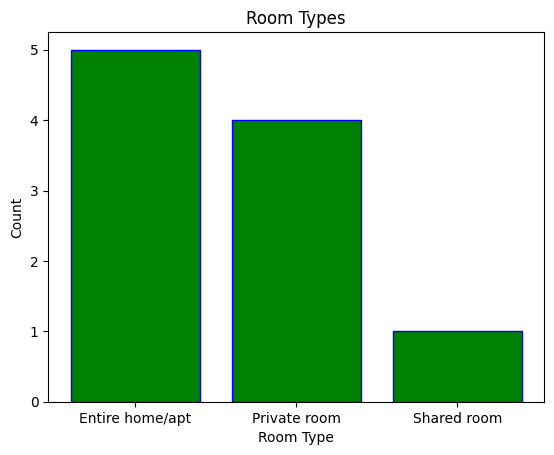

In [13]:
neighbourhood_group = ['Brooklyn', 'Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx', 'Queens', 'Bronx']
room_type = ['Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Shared room', 'Entire home/apt']

room_dict = {} #Create a dictionary named room_dict to store the count of each room type. Loop through the room_type list and increase the count of the room type in the dictionary if it already exists. If not, add the room type as a key with the count as 1.

for i in room_type:
    room_dict[i] = room_dict.get(i, 0) + 1

plt.bar(room_dict.keys(), room_dict.values(), color='green', edgecolor='blue') #Plot a bar graph using the plt.bar function. The x-axis will be the room types which are the keys of the room_dict dictionary and the y-axis will be the count of each room type which are the values of the room_dict dictionary.
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

We found that Entire home/apt is the highest number of room types overall and prices are high in the brooklyn and Manhattan for entire home/apt.

### 3.What can we learn from Data? (ex: locations, prices, reviews, etc)

In [14]:
area_reviews = airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_reviews


,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


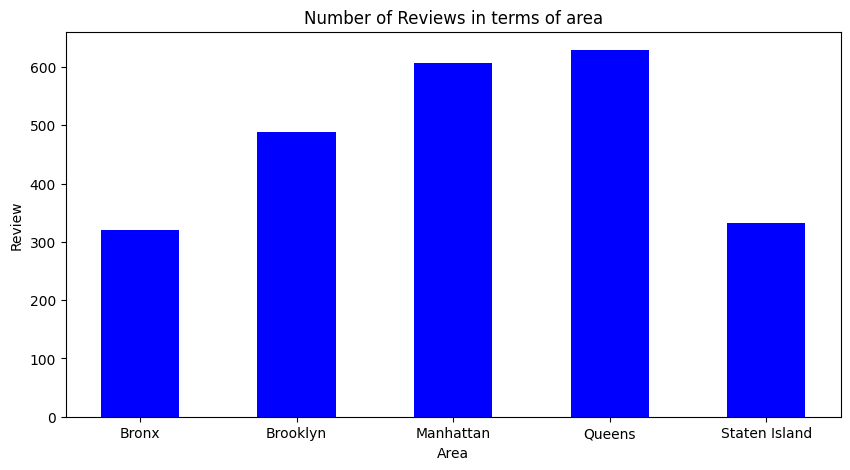

In [15]:
area = area_reviews['neighbourhood_group']
review = area_reviews['number_of_reviews']
fig = plt.figure(figsize =(10,5))

plt.bar(area, review, color ="blue", width =0.5)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.show()

In [16]:
price_area = airbnb.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


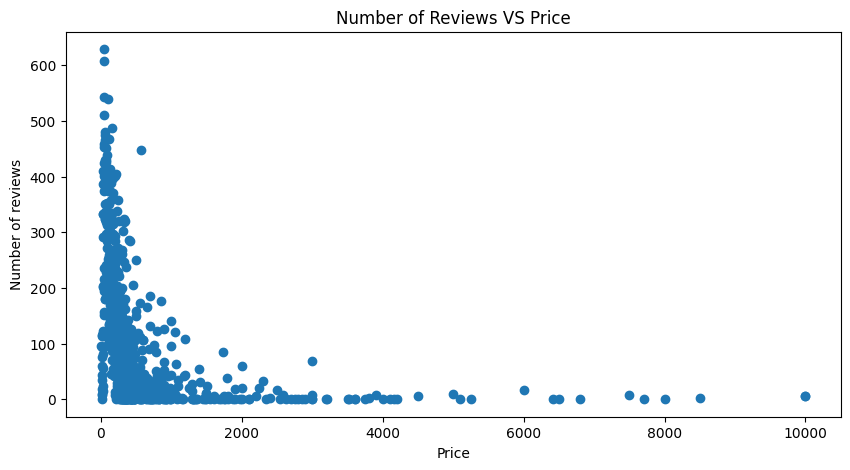

In [17]:
price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()

From the above visualization we can say that most number of people like to stay in lesss price and their reviews are higher in those areas

### 4.which hosts are the busiest and why is the reason ?

In [18]:
busy_hosts = airbnb.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending =False).head(10)
busy_hosts

,host_id,host_name,room_type,number_of_reviews
24484,47621202,Dona,Private room,629
7707,4734398,Jj,Private room,607
22213,37312959,Maya,Private room,543
4590,2369681,Carol,Private room,540
19443,26432133,Danielle,Private room,510
13707,12949460,Asa,Entire home/apt,488
1974,792159,Wanda,Private room,480
5056,2680820,Linda,Private room,474
161,42273,Dani,Entire home/apt,467
18289,23591164,Angela,Private room,466


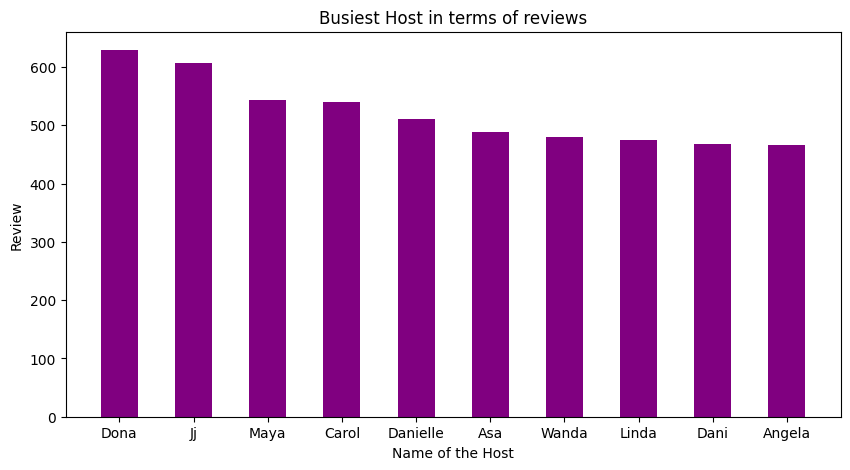

In [19]:
name_hosts = busy_hosts['host_name']
review_got = busy_hosts['number_of_reviews']

fig = plt.figure(figsize =(10,5))

plt.bar(name_hosts,review_got, color ='purple', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.show()

### we have found busiest hosts :   
1.Dona

2.Ji

3.Maya

4.Carol

5.Danielle

because these hosts listed their room type as entire home and private room which is preferred by most number of people and also their reviews are higher.

### 5.Which hosts are charging higher price

In [20]:
Highest_price= airbnb.groupby(['host_id','host_name','room_type','neighbourhood_group'])['price'].max().reset_index()
Highest_price= Highest_price.sort_values(by = 'price', ascending =False).head(10)
Highest_price

,host_id,host_name,room_type,neighbourhood_group,price
27920,72390391,Jelena,Entire home/apt,Manhattan,10000
17060,20582832,Kathrine,Private room,Queens,10000
8055,5143901,Erin,Entire home/apt,Brooklyn,10000
7325,4382127,Matt,Entire home/apt,Manhattan,9999
2659,1235070,Olson,Entire home/apt,Manhattan,9999
6628,3906464,Amy,Private room,Manhattan,9999
16096,18128455,Rum,Entire home/apt,Manhattan,8500
2561,1177497,Jessica,Entire home/apt,Brooklyn,8000
33424,156158778,Sally,Entire home/apt,Manhattan,7703
10113,7407743,Jack,Entire home/apt,Manhattan,7500


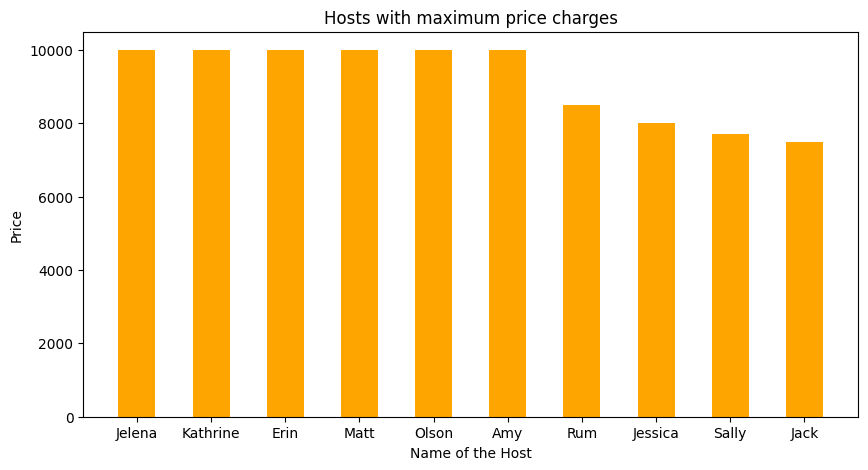

In [21]:
name_of_host = Highest_price ['host_name']
price_charge = Highest_price['price']

fig = plt.figure(figsize =(10,5))

plt.bar(name_of_host,price_charge , color ='orange', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.show()

we got 10 hosts who are charging high price

### 6. Is there any traffic difference among different areas and what could be the reason for it?

In [22]:
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188


In [23]:
traffic_areas = airbnb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by ='minimum_nights',ascending = False).head(10)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


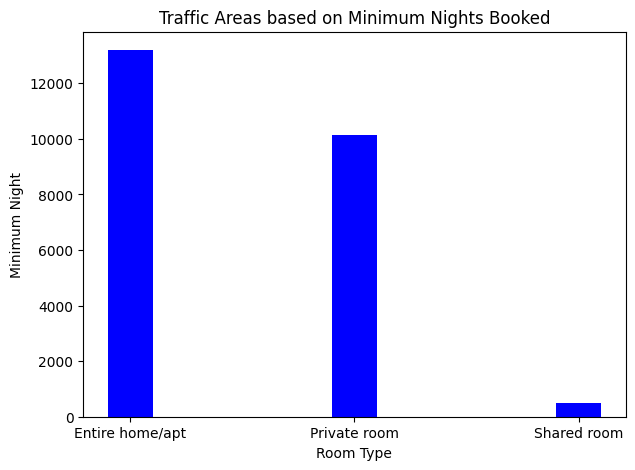

In [24]:
areas_Traffic = traffic_areas['room_type']
room_stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize =(7,5))

plt.bar(areas_Traffic,room_stayed, color ="blue", width = 0.2)

plt.xlabel("Room Type")
plt.ylabel("Minimum Night")
plt.title("Traffic Areas based on Minimum Nights Booked")
plt.show()

From this visualization We found that most of the people likely to stay at Entire home and Private room which are present in Manhattan, Brooklyn & Queens and also vistors referring stay in room which listing price is less.


In [25]:
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2


### 8. What is the room count in overall NYC according to the listing of room types?

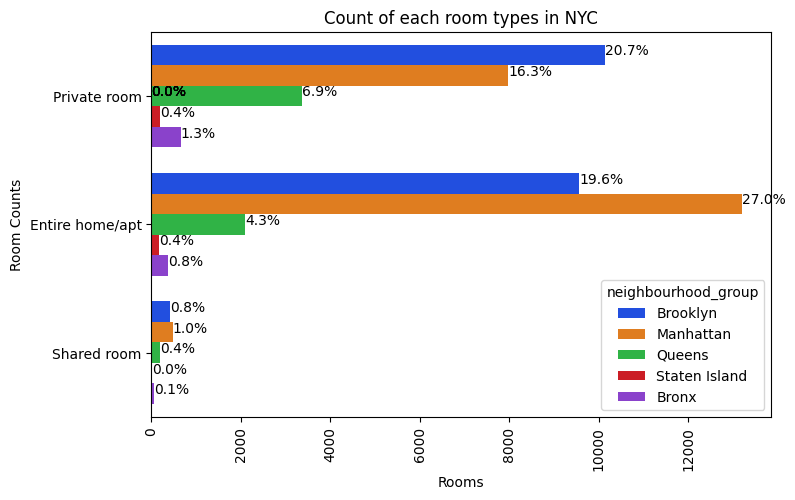

In [27]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=airbnb,palette='bright')

total = len(airbnb['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.
Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.
We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

## Conclusion:
1.We find that Host name Sonder(NYC) has listed highest number of listings in Manhattan followed by Blueground.

2.We found that Entire home/apt is the highest number of room types overall and prices are high in the brooklyn and Manhattan for entire home/apt.

3.From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas.

4.We have found Busiest hosts : Dona, Ji, Maya,Carol,Danielle

Because these hosts listed their room type as Entire home and Private room which is preferred by most number of people and also their reviews are higher.

5.Now we have seen that 10 Hosts who are charging maximum price: Jelena,Kathrine,Erin,Matt,Olson,Amy,Rum,Jessica,Sally & Jack
Max Price is 10000 USD

6.From this visualization We found that most of the people likely to stay at Entire home and Private room which are present in Manhattan, Brooklyn & Queens and also vistors referring stay in room which listing price is less.

7.We have seen all the correlation between different variables

8.Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%. Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens. We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

# THANK YOU